In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [135]:
movies_df = pd.read_csv('movies.csv')

# Movie table analysis

In [136]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [137]:
movies_df.head().T

,0,1,2,3,4
movieId,1,2,3,4,5
title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995)
genres,Adventure|Animation|Children|Comedy|Fantasy,Adventure|Children|Fantasy,Comedy|Romance,Comedy|Drama|Romance,Comedy


In [138]:
movies_df[['title', 'genres']] = movies_df[['title', 'genres']].apply(lambda x: x.str.upper())

In [139]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [140]:
movies_df.shape

(9742, 3)

In [141]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [142]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [143]:
movies_df.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [144]:
movies_df['genres'].value_counts()

genres
DRAMA                                        1053
COMEDY                                        946
COMEDY|DRAMA                                  435
COMEDY|ROMANCE                                363
DRAMA|ROMANCE                                 349
                                             ... 
CHILDREN|DRAMA|MUSICAL                          1
ADVENTURE|DRAMA|HORROR|MYSTERY|THRILLER         1
ADVENTURE|CHILDREN|COMEDY|FANTASY|MYSTERY       1
ADVENTURE|ANIMATION|CHILDREN|WESTERN            1
COMEDY|MYSTERY|ROMANCE|THRILLER                 1
Name: count, Length: 951, dtype: int64

In [145]:
duplicated_titles = movies_df[movies_df.duplicated('title', keep = False)]
duplicated_titles

,movieId,title,genres
650,838,EMMA (1996),COMEDY|DRAMA|ROMANCE
2141,2851,SATURN 3 (1980),ADVENTURE|SCI-FI|THRILLER
4169,6003,CONFESSIONS OF A DANGEROUS MIND (2002),COMEDY|CRIME|DRAMA|THRILLER
5601,26958,EMMA (1996),ROMANCE
5854,32600,EROS (2004),DRAMA
5931,34048,WAR OF THE WORLDS (2005),ACTION|ADVENTURE|SCI-FI|THRILLER
6932,64997,WAR OF THE WORLDS (2005),ACTION|SCI-FI
9106,144606,CONFESSIONS OF A DANGEROUS MIND (2002),COMEDY|CRIME|DRAMA|ROMANCE|THRILLER
9135,147002,EROS (2004),DRAMA|ROMANCE
9468,168358,SATURN 3 (1980),SCI-FI|THRILLER


In [146]:
duplicated_titles['title'].value_counts()

title
EMMA (1996)                               2
SATURN 3 (1980)                           2
CONFESSIONS OF A DANGEROUS MIND (2002)    2
EROS (2004)                               2
WAR OF THE WORLDS (2005)                  2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Most Frequent Genres')

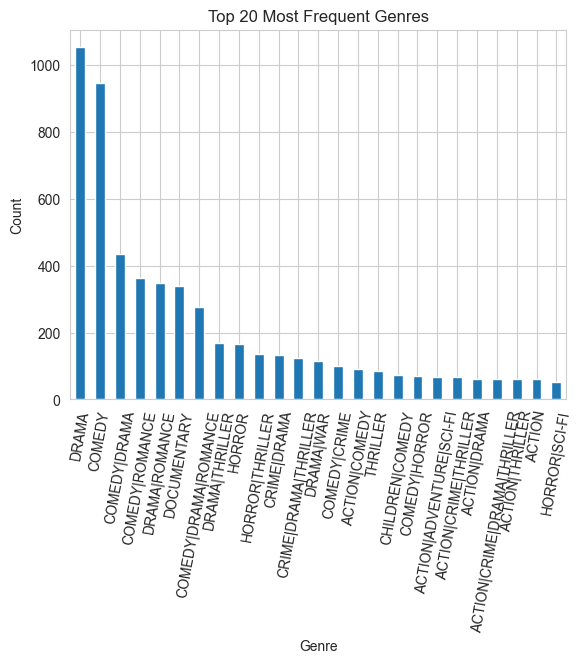

In [147]:
genres_count = movies_df['genres'].value_counts().head(25)
genres_count.plot(kind='bar')
plt.xticks(rotation = 80)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Genres')

In [179]:
len(movies_df[movies_df.genres=='(NO GENRES LISTED)'])

34

In [149]:
genre_counter = Counter()
for genre in movies_df.genres:
    genres = genre.split('|')
    genre_counter.update(genres)

genre_count = dict(genre_counter)
genre_count

{'ADVENTURE': 1263,
 'ANIMATION': 611,
 'CHILDREN': 664,
 'COMEDY': 3756,
 'FANTASY': 779,
 'ROMANCE': 1596,
 'DRAMA': 4361,
 'ACTION': 1828,
 'CRIME': 1199,
 'THRILLER': 1894,
 'HORROR': 978,
 'MYSTERY': 573,
 'SCI-FI': 980,
 'WAR': 382,
 'MUSICAL': 334,
 'DOCUMENTARY': 440,
 'IMAX': 158,
 'WESTERN': 167,
 'FILM-NOIR': 87,
 '(NO GENRES LISTED)': 34}

In [150]:
len(genre_count)

20

Text(0.5, 1.0, 'Number of movies in each genre')

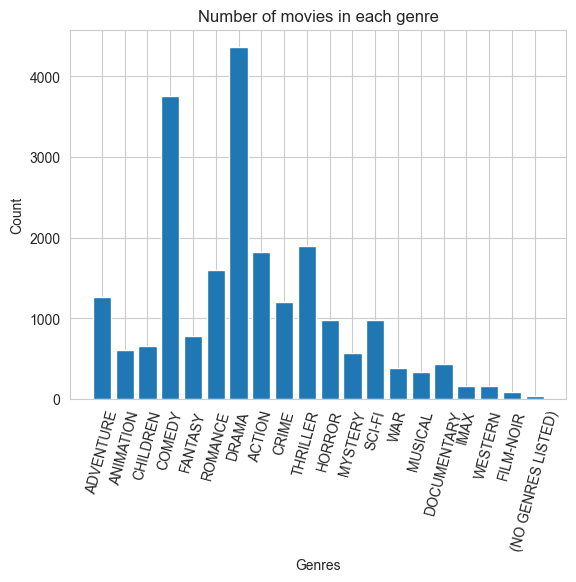

In [151]:
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation = 75)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of movies in each genre')

In [152]:
encoded_genres = movies_df.genres.str.get_dummies(sep='|')
movies_encoded_df = pd.concat([movies_df, encoded_genres], axis = 1)

In [153]:
movies_encoded_df.head()

,movieId,title,genres,(NO GENRES LISTED),ACTION,ADVENTURE,ANIMATION,CHILDREN,COMEDY,CRIME,...,FILM-NOIR,HORROR,IMAX,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,TOY STORY (1995),ADVENTURE|ANIMATION|CHILDREN|COMEDY|FANTASY,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,JUMANJI (1995),ADVENTURE|CHILDREN|FANTASY,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,GRUMPIER OLD MEN (1995),COMEDY|ROMANCE,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,WAITING TO EXHALE (1995),COMEDY|DRAMA|ROMANCE,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,FATHER OF THE BRIDE PART II (1995),COMEDY,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
movies_encoded_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)

In [168]:
movies_encoded_df.head()

,movieId,title,year,genres,(NO GENRES LISTED),ACTION,ADVENTURE,ANIMATION,CHILDREN,COMEDY,...,FILM-NOIR,HORROR,IMAX,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,TOY STORY (1995),1995,ADVENTURE|ANIMATION|CHILDREN|COMEDY|FANTASY,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,JUMANJI (1995),1995,ADVENTURE|CHILDREN|FANTASY,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,GRUMPIER OLD MEN (1995),1995,COMEDY|ROMANCE,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,WAITING TO EXHALE (1995),1995,COMEDY|DRAMA|ROMANCE,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,FATHER OF THE BRIDE PART II (1995),1995,COMEDY,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
movies_encoded_df.columns

Index(['movieId', 'title', 'year', 'genres', '(NO GENRES LISTED)', 'ACTION',
       'ADVENTURE', 'ANIMATION', 'CHILDREN', 'COMEDY', 'CRIME', 'DOCUMENTARY',
       'DRAMA', 'FANTASY', 'FILM-NOIR', 'HORROR', 'IMAX', 'MUSICAL', 'MYSTERY',
       'ROMANCE', 'SCI-FI', 'THRILLER', 'WAR', 'WESTERN'],
      dtype='object')

In [170]:
movies_encoded_df = movies_encoded_df.reindex(columns=['movieId', 'title', 'year','genres', '(NO GENRES LISTED)', 'ACTION',
       'ADVENTURE', 'ANIMATION', 'CHILDREN', 'COMEDY', 'CRIME', 'DOCUMENTARY',
       'DRAMA', 'FANTASY', 'FILM-NOIR', 'HORROR', 'IMAX', 'MUSICAL', 'MYSTERY',
       'ROMANCE', 'SCI-FI', 'THRILLER', 'WAR', 'WESTERN'])

In [171]:
movies_encoded_df.head()

,movieId,title,year,genres,(NO GENRES LISTED),ACTION,ADVENTURE,ANIMATION,CHILDREN,COMEDY,...,FILM-NOIR,HORROR,IMAX,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,TOY STORY (1995),1995,ADVENTURE|ANIMATION|CHILDREN|COMEDY|FANTASY,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,JUMANJI (1995),1995,ADVENTURE|CHILDREN|FANTASY,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,GRUMPIER OLD MEN (1995),1995,COMEDY|ROMANCE,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,WAITING TO EXHALE (1995),1995,COMEDY|DRAMA|ROMANCE,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,FATHER OF THE BRIDE PART II (1995),1995,COMEDY,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [172]:
movies_encoded_df.isnull().sum()

movieId               0
title                 0
year                  0
genres                0
(NO GENRES LISTED)    0
ACTION                0
ADVENTURE             0
ANIMATION             0
CHILDREN              0
COMEDY                0
CRIME                 0
DOCUMENTARY           0
DRAMA                 0
FANTASY               0
FILM-NOIR             0
HORROR                0
IMAX                  0
MUSICAL               0
MYSTERY               0
ROMANCE               0
SCI-FI                0
THRILLER              0
WAR                   0
WESTERN               0
dtype: int64

In [174]:
movies_encoded_df[movies_encoded_df['year'] == 0] = movies_encoded_df['year'].median()

In [177]:
movies_encoded_df.to_csv('movies_encoded.csv', index = False)